In [ ]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

Merging several csv files into one dataframe by using the glob function

In [ ]:
data_files = sorted(glob('/content/drive/MyDrive/data/*.csv'))
data_files

['/content/drive/MyDrive/data/data1.csv',
 '/content/drive/MyDrive/data/data10.csv',
 '/content/drive/MyDrive/data/data11.csv',
 '/content/drive/MyDrive/data/data12.csv',
 '/content/drive/MyDrive/data/data13.csv',
 '/content/drive/MyDrive/data/data14.csv',
 '/content/drive/MyDrive/data/data15.csv',
 '/content/drive/MyDrive/data/data16.csv',
 '/content/drive/MyDrive/data/data17.csv',
 '/content/drive/MyDrive/data/data18.csv',
 '/content/drive/MyDrive/data/data19.csv',
 '/content/drive/MyDrive/data/data2.csv',
 '/content/drive/MyDrive/data/data20.csv',
 '/content/drive/MyDrive/data/data21.csv',
 '/content/drive/MyDrive/data/data22.csv',
 '/content/drive/MyDrive/data/data23.csv',
 '/content/drive/MyDrive/data/data3.csv',
 '/content/drive/MyDrive/data/data4.csv',
 '/content/drive/MyDrive/data/data5.csv',
 '/content/drive/MyDrive/data/data6.csv',
 '/content/drive/MyDrive/data/data7.csv',
 '/content/drive/MyDrive/data/data8.csv',
 '/content/drive/MyDrive/data/data9.csv']

In [ ]:
df = pd.concat(pd.read_csv(datafile, encoding=('ISO-8859-1'),low_memory =False).assign(sourcefilename = datafile) for datafile in data_files)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(5)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,sourcefilename
0,`15,`000,STATE - MIZORAM,`00,`000,`0000,Total,185730,124545,61185,...,29084,13581,15503,6001,2316,3685,23083,11265,11818,/content/drive/MyDrive/data/data1.csv
1,`15,`000,STATE - MIZORAM,`01,`000,`0000,"Crop and animal production, hunting and relate...",6923,4018,2905,...,2260,659,1601,469,145,324,1791,514,1277,/content/drive/MyDrive/data/data1.csv
2,`15,`000,STATE - MIZORAM,`01,`011,`0000,Growing of non-perennial crops,2345,1389,956,...,401,180,221,106,46,60,295,134,161,/content/drive/MyDrive/data/data1.csv
3,`15,`000,STATE - MIZORAM,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",130,80,50,...,10,4,6,1,0,1,9,4,5,/content/drive/MyDrive/data/data1.csv
4,`15,`000,STATE - MIZORAM,`01,`011,`0112,Growing of rice,1908,1154,754,...,280,146,134,82,39,43,198,107,91,/content/drive/MyDrive/data/data1.csv


DATA CLEANING

Checking for the null values present in the dataset column-wise.

In [ ]:
df.isna().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

Cheking for the duplicated values

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11071    False
11072    False
11073    False
11074    False
11075    False
Length: 195145, dtype: bool

In [ ]:
df.shape

(195145, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195145 entries, 0 to 11075
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Male

Dropping Unwanted Columns

In [ ]:
df.drop(['State Code'], axis=1, inplace=True)

In [ ]:
df.drop(['District Code'], axis=1, inplace=True)

In [ ]:
df.drop(['Group'], axis=1, inplace=True)

In [ ]:
dforiginal=df.copy()

Dropping the duplicates in the NIC column

In [ ]:
df.drop_duplicates(subset=['NIC Name'], inplace=True)

In [ ]:
df['NIC Name'].shape

(587,)

natural language processing

Remove Punctuation

In [ ]:
df['NIC Name_data'] = df['NIC Name'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-43-001e8aa4d88b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['NIC Name_data'] = df['NIC Name'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
df = df[['NIC Name_data']]

In [ ]:
df['NIC Name_data']

0                                                  Total
1      Crop and animal production  hunting and relate...
2                         Growing of non perennial crops
3      Growing of cereals  except rice   leguminous c...
4                                        Growing of rice
                             ...                        
592    Renting and leasing of recreational and sports...
314        Treatment and disposal of non hazardous waste
587                                           Blank etc 
334                                   Materials recovery
67                    Mining of uranium and thorium ores
Name: NIC Name_data, Length: 587, dtype: object

In [ ]:
df['NIC Name_data'] = df['NIC Name_data'].fillna("")

Replacing the short words

In [ ]:
df['NIC Name_data'] = df['NIC Name_data'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
df['NIC Name_data']

0                                                  Total
1      Crop and animal production hunting and related...
2                            Growing non perennial crops
3      Growing cereals except rice leguminous crops a...
4                                           Growing rice
                             ...                        
592    Renting and leasing recreational and sports goods
314           Treatment and disposal non hazardous waste
587                                            Blank etc
334                                   Materials recovery
67                       Mining uranium and thorium ores
Name: NIC Name_data, Length: 587, dtype: object

In [ ]:
df['NIC Name_data'] = [rev.lower() for rev in df['NIC Name_data']]

In [ ]:
df['NIC Name_data']

0                                                  total
1      crop and animal production hunting and related...
2                            growing non perennial crops
3      growing cereals except rice leguminous crops a...
4                                           growing rice
                             ...                        
592    renting and leasing recreational and sports goods
314           treatment and disposal non hazardous waste
587                                            blank etc
334                                   materials recovery
67                       mining uranium and thorium ores
Name: NIC Name_data, Length: 587, dtype: object

Remove stopwords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(des):
  description_tokenized = word_tokenize(des)
  des_new = " ".join([i for i in description_tokenized if i not in stop_words])
  return des_new

df['NIC Name_data'] = [remove_stopwords(r) for r in df['NIC Name_data']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['NIC Name_data']

0                                                  total
1      crop animal production hunting related service...
2                            growing non perennial crops
3      growing cereals except rice leguminous crops o...
4                                           growing rice
                             ...                        
592            renting leasing recreational sports goods
314               treatment disposal non hazardous waste
587                                            blank etc
334                                   materials recovery
67                           mining uranium thorium ores
Name: NIC Name_data, Length: 587, dtype: object

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)
  df['NIC Name_data'] = df['NIC Name_data'].apply(lambda x: lemmatize_sentence(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df

,NIC Name_data
0,total
1,crop animal production hunting related service...
2,growing non perennial crops
3,growing cereals except rice leguminous crops o...
4,growing rice
...,...
592,renting leasing recreational sports goods
314,treatment disposal non hazardous waste
587,blank etc
334,materials recovery


EDA

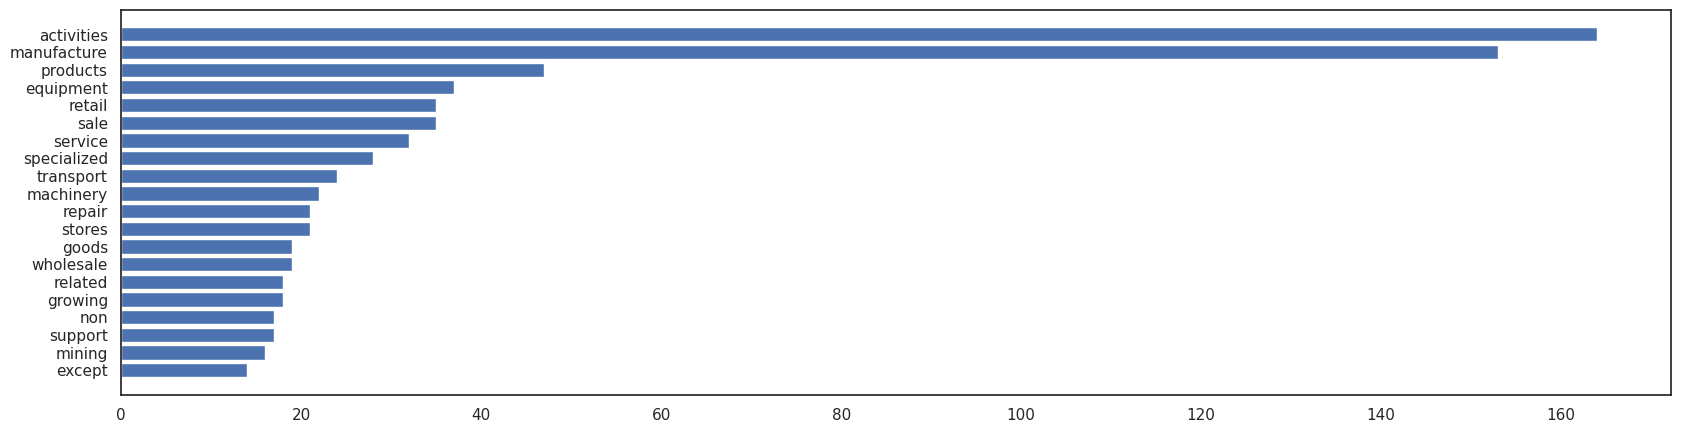

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

all_words = ' '.join([text for text in df['NIC Name_data']])
all_words = all_words.split()
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 20)
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In bag of words we're using TFIDF to convert NIC Name column to Numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(df['NIC Name_data']).toarray()
featureNames = tfidf.get_feature_names_out()

In [ ]:
feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

we are importing kmeans which is unsupervised learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

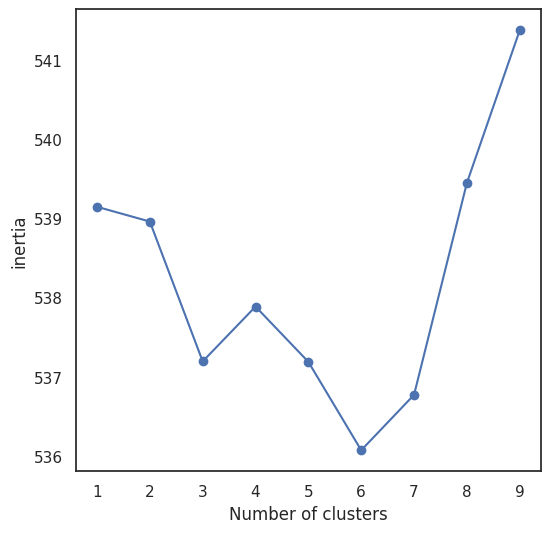

In [ ]:
contat = []
list_k = list(range(1, 10))
for k in list_k:
  km = KMeans(n_clusters=5)
  km.fit(feature)
  contat.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k, contat, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('inertia');
plt.show()